In [48]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [49]:
xmin, xmax = -50000, 50000
ymin, ymax = -50000, 50000
zmin, zmax = -80000, 0
nx, ny, nz = 101, 101, 81
cx, cy, cz = 0, 0, -25000
sigmax, sigmay, sigmaz = 12000, 12000, 5000

In [50]:
# add gaussian anomaly
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
z = np.linspace(zmin, zmax, nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
pert = -0.1
data = np.exp(-(((X - cx) ** 2) / (2 * sigmax ** 2) +
                 ((Y - cy) ** 2) / (2 * sigmay ** 2) +
                 ((Z - cz) ** 2) / (2 * sigmaz ** 2)))
data *= pert

In [51]:
# create two-layer model
vc, vm = 3800, 4300
vs = np.ones((nx, ny, nz))
moho = -40000
vs[:, :, z < moho] = vm
vs[:, :, z >= moho] = vc
vs *= np.exp(data)
vp = vs * 1.73
rho = vs * 0.31 + 1600
print('vs c/m', vc, vm)
print('vp c/m', vc*1.73, vm*1.73)
print('rho g/cm3', vc*0.31+1600, vm*0.31+1600)

vs c/m 3800 4300
vp c/m 6574.0 7439.0
rho g/cm3 2778.0 2933.0


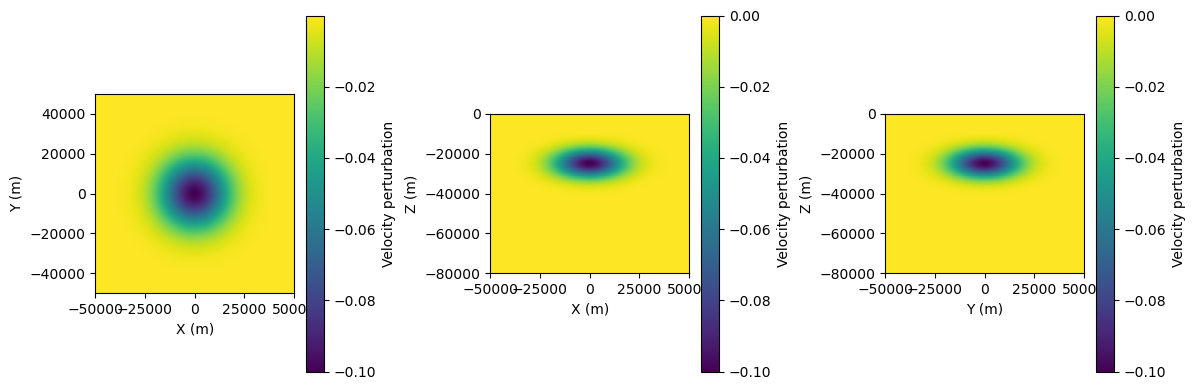

In [52]:
# plot slices
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(data[:, :, np.argmin(np.abs(z-cz))].T, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='viridis')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.colorbar(label='Velocity perturbation')
plt.subplot(1, 3, 2)
plt.imshow(data[:, ny // 2, :].T, extent=[xmin, xmax, zmin, zmax], origin='lower', cmap='viridis')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.colorbar(label='Velocity perturbation')
plt.subplot(1, 3, 3)
plt.imshow(data[nx // 2, :, :].T, extent=[ymin, ymax, zmin, zmax], origin='lower', cmap='viridis')
plt.xlabel('Y (m)')
plt.ylabel('Z (m)')
plt.colorbar(label='Velocity perturbation')
plt.tight_layout()



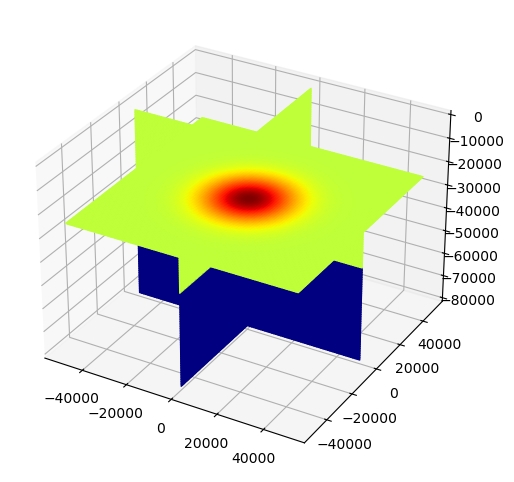

In [53]:
# plot 3D isosurface
from mpl_toolkits.mplot3d import Axes3D
cmap = plt.get_cmap('jet_r')
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
iz = np.argmin(np.abs(z - cz))

facecolors = cmap((vs[:, :, iz] - np.min(vs)) / (np.max(vs) - np.min(vs)))
Axes3D.plot_surface(ax, X[:, :, iz], Y[:, :, iz], Z[:, :, iz], facecolors=facecolors, rstride=1, cstride=1, shade=False)
iy = ny // 2
facecolors = cmap((vs[:, iy, :] - np.min(vs)) / (np.max(vs) - np.min(vs)))
Axes3D.plot_surface(ax, X[:, iy, :], Y[:, iy, :], Z[:, iy, :], facecolors=facecolors, rstride=1, cstride=1, shade=False)
ix = nx // 2
facecolors = cmap((vs[ix, :, :] - np.min(vs)) / (np.max(vs) - np.min(vs)))
h=ax.plot_surface(X[ix, :, :], Y[ix, :, :], Z[ix, :, :], facecolors=facecolors, rstride=1, cstride=1, shade=False)
# fig.colorbar(h, shrink=0.5, aspect=5, label='Velocity (km/s)')

In [54]:
# write to h5 file
with h5py.File('DATA/pert_model.h5', 'w') as f:
    f.create_dataset('vs', data=vs)
    f.create_dataset('vp', data=vp)
    f.create_dataset('rho', data=rho)
    f.create_dataset('x', data=x)
    f.create_dataset('y', data=y)
    f.create_dataset('z', data=z)